In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv


--2023-01-02 20:05:23--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]   6.92K  --.-KB/s    in 0s      

2023-01-02 20:05:23 (61.0 MB/s) - ‘penguins.csv’ saved [7086/7086]



In [7]:
data = pd.read_csv('penguins.csv')

In [34]:
data

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [9]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(data.columns[0:5].values, 'SpeciesName')

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName


In [11]:
for index,row in data.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

[ 38.2 18.1 185.0 3950.0 0 ] Adelie
[ 41.0 20.0 203.0 4725.0 0 ] Adelie
[ 40.2 17.0 176.0 3450.0 0 ] Adelie
[ 51.3 18.2 197.0 3750.0 2 ] Chinstrap
[ 45.3 13.7 210.0 4300.0 1 ] Gentoo
[ 46.2 14.4 214.0 4650.0 1 ] Gentoo
[ 35.5 17.5 190.0 3700.0 0 ] Adelie
[ 36.2 16.1 187.0 3550.0 0 ] Adelie
[ 43.1 19.2 197.0 3500.0 0 ] Adelie
[ 34.4 18.4 184.0 3325.0 0 ] Adelie


In [14]:
data.isnull().sum()
data[data.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [15]:
data=data.dropna()

In [16]:
data.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [19]:
feature = list(data.columns)

In [21]:
label,feature = feature[-1],feature[:-1]

In [27]:
label

'Species'

CulmenLength
CulmenDepth
FlipperLength
BodyMass


<function matplotlib.pyplot.show(close=None, block=None)>

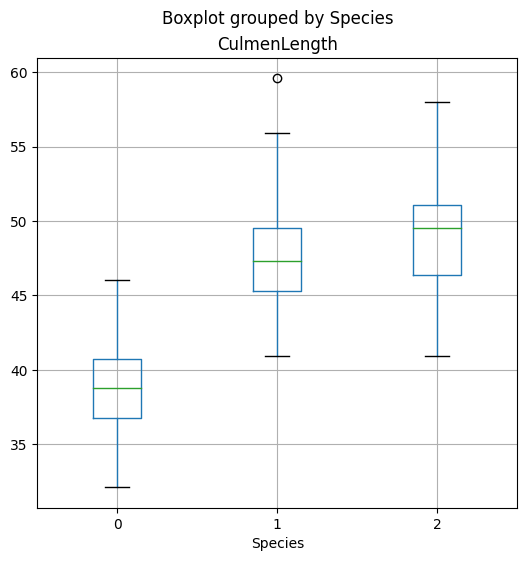

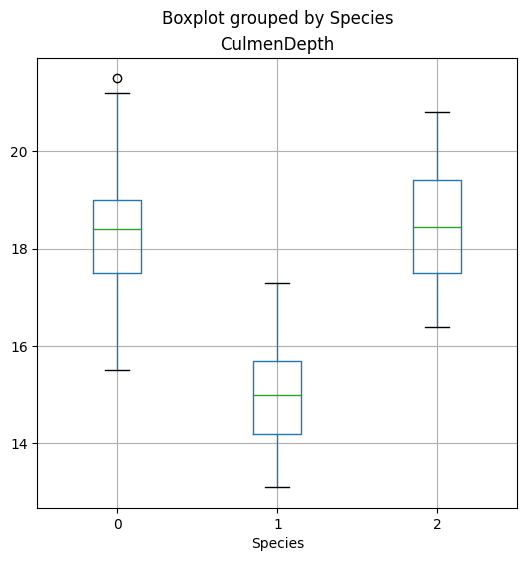

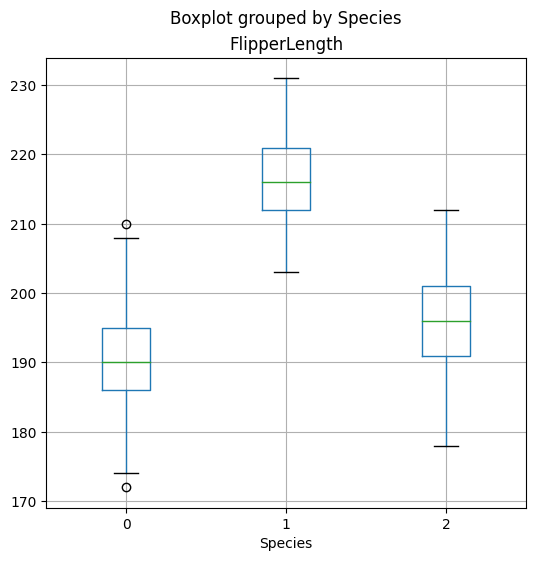

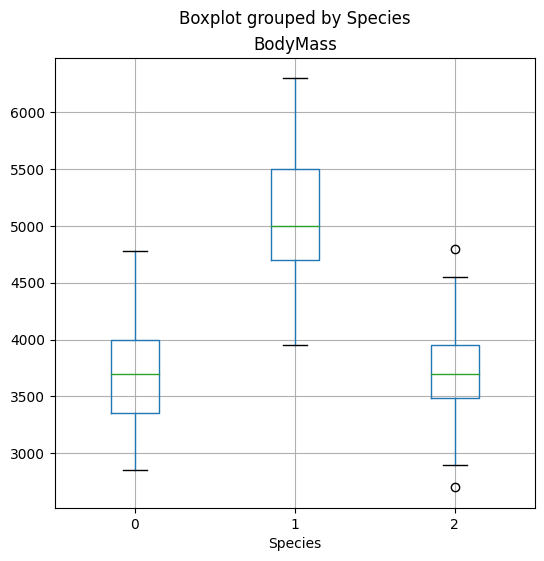

In [30]:
for col in feature:
    print(col)
    data.boxplot(column=col,by='Species',figsize=(6,6))
    plt.title(col)
plt.show

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(data[feature].values,data[label].values,test_size=0.30,random_state=123)

In [40]:
req=0.1
model = LogisticRegression(C=1/req,solver='lbfgs',multi_class='auto',max_iter=10000)

In [42]:
model = model.fit(xtrain,ytrain)

In [46]:
pre = model.predict(xtest)

In [47]:
accuracy_score(pre,ytest)

0.9805825242718447

In [49]:
con=confusion_matrix(pre,ytest)

In [58]:
con

array([[42,  0,  0],
       [ 0, 36,  0],
       [ 2,  0, 23]])

In [59]:
total_sample = con.sum()

In [60]:
total_sample

103

In [61]:
correct = con.diagonal().sum()

In [62]:
correct

101

In [63]:
correct/total_sample

0.9805825242718447

In [67]:
from sklearn.metrics import classification_report
# print(recall_score(ytest,pre))

In [69]:
print(classification_report(ytest,pre))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       1.00      1.00      1.00        36
           2       0.92      1.00      0.96        23

    accuracy                           0.98       103
   macro avg       0.97      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



In [70]:
row_sum = con.sum(axis=1)

In [72]:
import numpy as np

In [73]:
recall = np.zeros(con.shape[0])

In [74]:
for i in range(con.shape[0]):
    recall[i]+=con[i,i]/row_sum[i]

In [75]:
recall

array([1.  , 1.  , 0.92])

In [76]:
column_sum = con.sum(axis=0)
precision = np.zeros(con.shape[0])

In [77]:
for i in range(con.shape[0]):
    precision[i]+=con[i,i]/column_sum[i]

In [78]:
precision

array([0.95454545, 1.        , 1.        ])

In [79]:
f1=2*(recall*precision)/(recall+precision)

In [80]:
f1

array([0.97674419, 1.        , 0.95833333])